# Machine Learning Race Predictor
## Supervised Learning - Regression

## Data Preparation:

First we load the raw data that was gathered from thousands of users' public training logs. These contained training data as well as race results.

In [88]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import datetime
import time

pd.set_option('display.max_rows', 500)

# Pretty display for notebooks
%matplotlib inline

# Display a description of the dataset
pd.set_option('display.max_columns', 500)

# Load the wholesale customers dataset
try:
    all_data = pd.read_csv("marathonData.csv")
    print "Running dataset has {} samples with {} features each.".format(*all_data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
    
m_data = all_data[[
    '5K','half','marathon','marathonTrainDis12',
    'marathonTrainDis3','marathonTrainPaceSec12',
    'marathonTrainDays12']].dropna()


m_data = m_data.replace(0,np.nan).dropna()
m_data = m_data.replace('null',np.nan).dropna()

m_data.reset_index(drop=True, inplace=True)

#data = data.drop(['marathonDate','halfDate','5KDate'], axis=1)

x = time.strptime('2:24:31','%H:%M:%S')
seconds = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
print seconds

def timeToSeconds(t):
    t = t.split('.')[0]
    try:
        x = time.strptime(t,'%H:%M:%S')
        return datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    except:
        x = time.strptime(t,'%M:%S')
        return datetime.timedelta(minutes=x.tm_min,seconds=x.tm_sec).total_seconds()

m_data['5K'] = m_data['5K'].map(lambda x: timeToSeconds(x))
m_data['half'] = m_data['half'].map(lambda x: timeToSeconds(x))
m_data['marathon'] = m_data['marathon'].map(lambda x: timeToSeconds(x))

#data['distance'] = data['distance'].map(lambda x: x.split(" ")[0])
display(m_data)

Running dataset has 3394 samples with 54 features each.
8671.0


,5K,half,marathon,marathonTrainDis12,marathonTrainDis3,marathonTrainPaceSec12,marathonTrainDays12
0,1471.0,8412.0,20555.0,22.182961,38.215652,646.399640,55.0
1,1287.0,5651.0,12010.0,27.019282,108.077129,519.261585,35.0
2,1226.0,6139.0,13180.0,68.703089,121.625807,526.852776,120.0
3,1183.0,5275.0,10865.0,34.410016,84.680771,481.072440,69.0
4,1204.0,5992.0,13605.0,9.969478,39.877913,525.942606,22.0
5,1153.0,5388.0,12812.0,62.907322,108.962811,529.231548,110.0
6,1157.0,5225.0,11649.0,16.729431,48.173626,458.909561,33.0
7,1071.0,5128.0,10632.0,152.126819,197.966375,502.122272,397.0
8,1114.0,5349.0,11119.0,46.865294,110.137541,488.994772,97.0
9,1280.0,6086.0,15002.0,63.554054,88.057562,541.964204,115.0


In [89]:
# before removing general outliers, remove other nonsense data.

# remove 5K times that are below the world record haha
m_data = m_data.loc[m_data['5K'] > timeToSeconds('12:37')]

# same for half times
m_data = m_data.loc[m_data['half'] > timeToSeconds('58:23')]

# same for marathon times
m_data = m_data.loc[m_data['marathon'] > timeToSeconds('2:02:57')]

# remove anyone running less than 20 miles a month for the past 12 months to prepare for a marathon as this most likely means they are not
# tracking all their data from the garmin connect site.
m_data = m_data.loc[m_data['marathonTrainDis12'] > 20]

# remove anyone running less than 60 miles a month in the last 3 months to prepare for a marathon as this most likely means they are not
# tracking all their data from the garmin connect site.
m_data = m_data.loc[m_data['marathonTrainDis3'] > 60]

# no one is averaging under 5 minute pace for all of training
m_data = m_data.loc[m_data['marathonTrainPaceSec12'] > 300]

# remove anyone who's 5K vs Marathon times our totally out of whack. If you ran a sub 3 hour marathon and then ran a
# 5K over 25 minutes, it's probably not an actual race, or maybe they ran with a friend or something. So even though
# on their own, these aren't outliers, they are compared to each other.
# Actually going to use Riegel's formula to help estalish a baseline for this
# T2=T1*(D2/D1)^1.06

import math
from __future__ import division

d1 = 5000 #5K
d2 = 42195 #Marathon in meters

def riegel(t1, d1=d1, d2=d2):
    return t1 * math.pow((d2/d1),1.06)

def secondsToTime(seconds):
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    return "%d:%02d:%02d" % (h, m, s)

#test riegel
print timeToSeconds('14:44')
print secondsToTime(8491)
print riegel(timeToSeconds('14:44'))
print 'expected 2:21:31: ', secondsToTime(riegel(timeToSeconds('14:44')))

riegel_y = m_data[["5K"]].applymap(lambda x: riegel(x)) 
riegel_y.rename(columns = {'5K':'marathon_pred'}, inplace=True)

data_with_rpred = pd.concat([m_data, riegel_y], axis=1)
data_with_rpred = data_with_rpred.sort_values(by=['5K'])

data_with_rpred = data_with_rpred[data_with_rpred.apply(
    lambda x: abs(x['marathon_pred'] - x['marathon'])/x['marathon'] < .3, axis=1)]

data_with_rpred = data_with_rpred.reset_index(drop = True)
display(data_with_rpred.describe())


884.0
2:21:31
8478.5329268
expected 2:21:31:  2:21:18


,5K,half,marathon,marathonTrainDis12,marathonTrainDis3,marathonTrainPaceSec12,marathonTrainDays12,marathon_pred
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,1310.096565,6205.127205,14046.539461,82.609182,123.998240,564.604720,159.772516,12565.267941
std,211.315881,1115.261871,2823.301523,46.554125,47.403067,100.910313,92.974730,2026.751870
min,875.000000,3928.000000,8254.000000,20.277947,60.197433,397.018304,28.000000,8392.213021
25%,1164.000000,5396.000000,11979.000000,46.418189,89.394826,494.934920,91.000000,11164.041094
50%,1280.000000,6006.000000,13602.000000,74.263142,113.860892,544.292804,143.000000,12276.608763
75%,1422.000000,6765.000000,15518.000000,106.722867,148.254309,611.168081,206.000000,13638.545047
max,2460.000000,11536.000000,27608.000000,292.278390,382.276306,1194.877270,610.000000,23594.107466


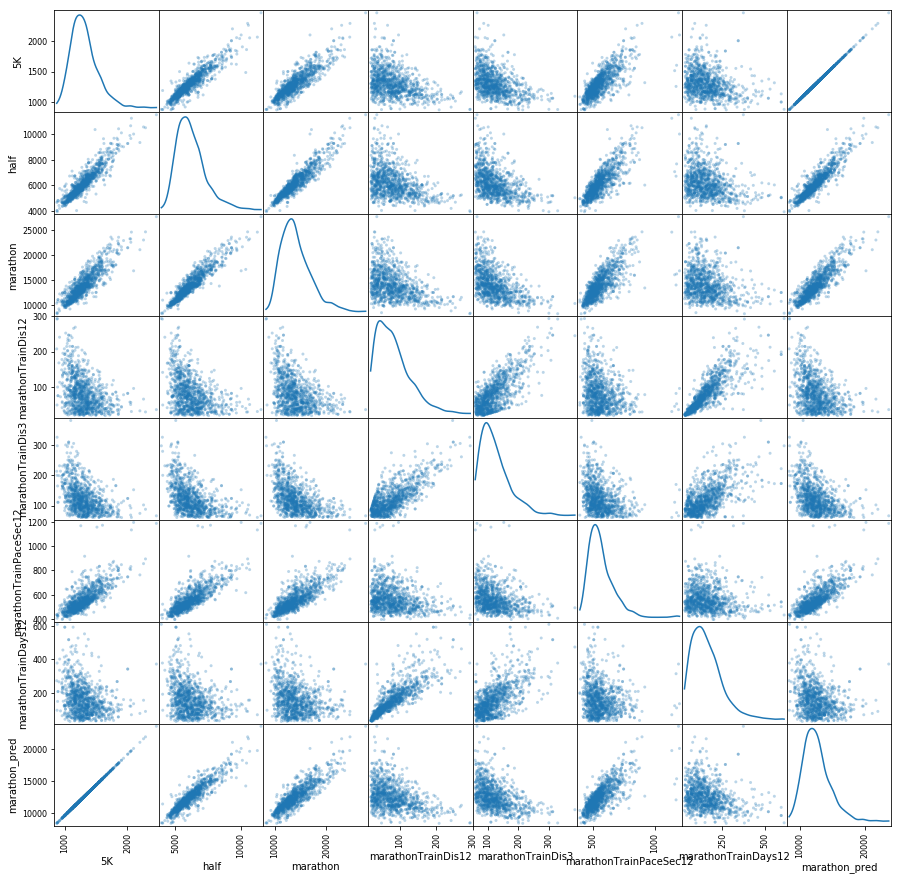

In [90]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data_with_rpred, alpha = 0.3, figsize = (15,15), diagonal = 'kde');

In [91]:
# Now we remove outliers, but first let's remove the rpred and rename the dataframe
data_clean = data_with_rpred.drop('marathon_pred', axis = 1)

feature_sets = {} 
outliers = []
for feature in data_clean.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data_clean[feature], 25)
    print Q1
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data_clean[feature], 75)
    print Q3
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 3
    
    # Outliers
    feature_outliers = data_clean[~((data_clean[feature] >= Q1 - step) & (data_clean[feature] <= Q3 + step))]
    
    print "feature_outliers.index.values: ", feature_outliers.index.values.tolist()
    outliers += feature_outliers.index.values.tolist()
    # Add to feature set
    feature_sets[feature] = set(feature_outliers.index.values)
    print feature_sets
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(feature_outliers)

1164.0
1422.0
feature_outliers.index.values:  [1073, 1074, 1075, 1076]
{'5K': set([1073, 1074, 1075, 1076])}
Data points considered outliers for the feature '5K':


,5K,half,marathon,marathonTrainDis12,marathonTrainDis3,marathonTrainPaceSec12,marathonTrainDays12
1073,2198.0,9356.0,21014.0,33.737739,74.112400,763.420829,76.0
1074,2256.0,10577.0,22951.0,66.584437,102.105674,856.205681,155.0
1075,2287.0,10516.0,24574.0,30.663111,87.660163,894.888163,88.0
1076,2460.0,11536.0,27608.0,37.178151,66.048910,1186.995222,372.0


5396.0
6765.0
feature_outliers.index.values:  [1071, 1076]
{'5K': set([1073, 1074, 1075, 1076]), 'half': set([1076, 1071])}
Data points considered outliers for the feature 'half':


,5K,half,marathon,marathonTrainDis12,marathonTrainDis3,marathonTrainPaceSec12,marathonTrainDays12
1071,2063.0,11258.0,24525.0,31.827614,60.730374,1133.141371,68.0
1076,2460.0,11536.0,27608.0,37.178151,66.048910,1186.995222,372.0


11979.0
15518.0
feature_outliers.index.values:  [1076]
{'marathon': set([1076]), '5K': set([1073, 1074, 1075, 1076]), 'half': set([1076, 1071])}
Data points considered outliers for the feature 'marathon':


,5K,half,marathon,marathonTrainDis12,marathonTrainDis3,marathonTrainPaceSec12,marathonTrainDays12
1076,2460.0,11536.0,27608.0,37.178151,66.04891,1186.995222,372.0


46.4181894966
106.722867425
feature_outliers.index.values:  [2, 3]
{'marathonTrainDis12': set([2, 3]), 'marathon': set([1076]), '5K': set([1073, 1074, 1075, 1076]), 'half': set([1076, 1071])}
Data points considered outliers for the feature 'marathonTrainDis12':


,5K,half,marathon,marathonTrainDis12,marathonTrainDis3,marathonTrainPaceSec12,marathonTrainDays12
2,881.0,4009.0,8254.0,290.864106,326.729189,407.470444,378.0
3,884.0,3928.0,8359.0,292.278390,298.332074,434.060513,610.0


89.3948264506
148.25430922
feature_outliers.index.values:  [2, 141]
{'marathonTrainDis3': set([2, 141]), 'marathonTrainDis12': set([2, 3]), 'marathon': set([1076]), '5K': set([1073, 1074, 1075, 1076]), 'half': set([1076, 1071])}
Data points considered outliers for the feature 'marathonTrainDis3':


,5K,half,marathon,marathonTrainDis12,marathonTrainDis3,marathonTrainPaceSec12,marathonTrainDays12
2,881.0,4009.0,8254.0,290.864106,326.729189,407.470444,378.0
141,1098.0,5027.0,10294.0,244.226577,382.276306,493.317984,474.0


494.934920489
611.168080631
feature_outliers.index.values:  [480, 914, 987, 1071, 1072, 1076]
{'5K': set([1073, 1074, 1075, 1076]), 'half': set([1076, 1071]), 'marathonTrainDis12': set([2, 3]), 'marathonTrainDis3': set([2, 141]), 'marathonTrainPaceSec12': set([480, 1071, 1072, 914, 1076, 987]), 'marathon': set([1076])}
Data points considered outliers for the feature 'marathonTrainPaceSec12':


,5K,half,marathon,marathonTrainDis12,marathonTrainDis3,marathonTrainPaceSec12,marathonTrainDays12
480,1258.0,6719.0,13980.0,82.526908,170.019747,1167.405395,314.0
914,1515.0,7072.0,16024.0,46.304938,110.971417,1156.220279,122.0
987,1603.0,7680.0,16183.0,53.440205,76.425456,1171.743610,109.0
1071,2063.0,11258.0,24525.0,31.827614,60.730374,1133.141371,68.0
1072,2098.0,10022.0,16809.0,96.517673,152.496230,1194.877270,134.0
1076,2460.0,11536.0,27608.0,37.178151,66.048910,1186.995222,372.0


91.0
206.0
feature_outliers.index.values:  [3, 37, 39, 208, 616]
{'5K': set([1073, 1074, 1075, 1076]), 'half': set([1076, 1071]), 'marathonTrainDis12': set([2, 3]), 'marathonTrainDis3': set([2, 141]), 'marathonTrainPaceSec12': set([480, 1071, 1072, 914, 1076, 987]), 'marathon': set([1076]), 'marathonTrainDays12': set([208, 616, 3, 37, 39])}
Data points considered outliers for the feature 'marathonTrainDays12':


,5K,half,marathon,marathonTrainDis12,marathonTrainDis3,marathonTrainPaceSec12,marathonTrainDays12
3,884.0,3928.0,8359.0,292.278390,298.332074,434.060513,610.0
37,1003.0,5032.0,12478.0,191.612320,173.139802,541.375894,593.0
39,1003.0,5032.0,12478.0,191.612320,173.139802,541.375894,593.0
208,1136.0,5069.0,10722.0,198.652812,222.442095,502.571581,593.0
616,1317.0,6033.0,12976.0,145.073019,172.781413,515.122069,553.0


In [92]:
# drop outliers
data_clean = data_clean.drop(data_clean.index[outliers]).reset_index(drop = True)

display(data_clean)

,5K,half,marathon,marathonTrainDis12,marathonTrainDis3,marathonTrainPaceSec12,marathonTrainDays12
0,875.0,4667.0,10331.0,207.362928,213.747223,434.675434,272.0
1,880.0,4034.0,8463.0,50.101988,200.407954,438.533737,95.0
2,889.0,4708.0,10670.0,100.351612,164.993604,426.526491,148.0
3,895.0,4818.0,11057.0,76.106450,110.858586,426.275922,207.0
4,895.0,4818.0,11057.0,76.106450,110.858586,426.275922,207.0
5,910.0,4421.0,9214.0,168.087268,199.126556,449.782594,265.0
6,920.0,4194.0,8814.0,240.070732,232.004619,475.408627,335.0
7,922.0,5749.0,12200.0,113.754862,127.331799,511.659133,402.0
8,935.0,4761.0,10610.0,73.077787,214.101736,490.080697,91.0
9,953.0,4898.0,10829.0,148.575903,197.322555,510.964064,253.0


In [93]:
# Split the data into features and target label
y = data_clean['marathon']
x = data_clean.drop('marathon', axis = 1)

In [94]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 848 samples.
Testing set has 213 samples.


In [95]:
## Using Reigel (the old runner's world formula) as a benchmark on prenormalized
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def secondsToTime(seconds):
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    return "%d:%02d:%02d" % (h, m, s)

compare = None

def printResults(x, y_true, y_pred):
    global compare
    
    x.reset_index(drop=True, inplace=True)
    y_true.reset_index(drop=True, inplace=True)
    y_pred.reset_index(drop=True, inplace=True)
    
    compare = pd.concat([x, y_pred, y_true], axis=1)
    compare.columns = ['5K','half','avg_dis3','avg_dis12','avg_pace','train_days','marathon_pred','marathon_true']
    compare = compare.sort_values(by=['5K'])
    percent_off = abs(100 * (compare['marathon_pred'] - compare['marathon_true'])/compare['marathon_true'])

    print 'Average percent off {0:.2f}%'.format(percent_off.mean())
    #print 'Average actual marathon time {}'.format(secondsToTime(compare['marathon_true'].mean()))
    #print 'Average predicted marathon time {}'.format(secondsToTime(compare['marathon_pred'].mean()))
    percent_off_formatted = percent_off.map(lambda x: "{0:.2f}%".format(x))

    #print 'RMSE: ', mean_squared_error(compare['marathon_true'], compare['marathon_pred'])
    print 'Coefficient of Determination (R2): ', r2_score(compare['marathon_true'], compare['marathon_pred'])
    
    #display(compare)
    
    compare['5K'] = compare['5K'].map(lambda x: secondsToTime(x))
    compare['half'] = compare['half'].map(lambda x: secondsToTime(x))
    compare['avg_dis3'] = compare['avg_dis3'].map(lambda x: "{0:.0f}".format(x))
    compare['avg_dis12'] = compare['avg_dis12'].map(lambda x: "{0:.0f}".format(x))
    compare['avg_pace'] = compare['avg_pace'].map(lambda x: secondsToTime(x))
    compare['marathon_pred'] = compare['marathon_pred'].map(lambda x: secondsToTime(x))
    compare['marathon_true'] = compare['marathon_true'].map(lambda x: secondsToTime(x))
    compare = pd.concat([compare, percent_off_formatted], axis=1)
    compare.columns.values[8] = 'percent_off'
    

    #display(compare)
    

riegel_5k = x["5K"].map(lambda x: riegel(x))
printResults(x, y, riegel_5k)

riegel_half = x["half"].map(lambda x: riegel(x, 21097))
printResults(x, y, riegel_half)


Average percent off 10.60%
Coefficient of Determination (R2):  0.431096930489
Average percent off 7.86%
Coefficient of Determination (R2):  0.68273487227


### Riegel's Unrealistic formula

As you can see from the chart below, the current age old formula is not very good at predicting marathon results from 5K times. Out of all the data points, very few are below the line, and the ones that are, are the elite, faster times. AS you move to the right, they get farther away from the line.

Without even providing any other features, it would already be easy to vastly improve on this formula from doing a simple linear regression on 5K alone. Let's do that and see!

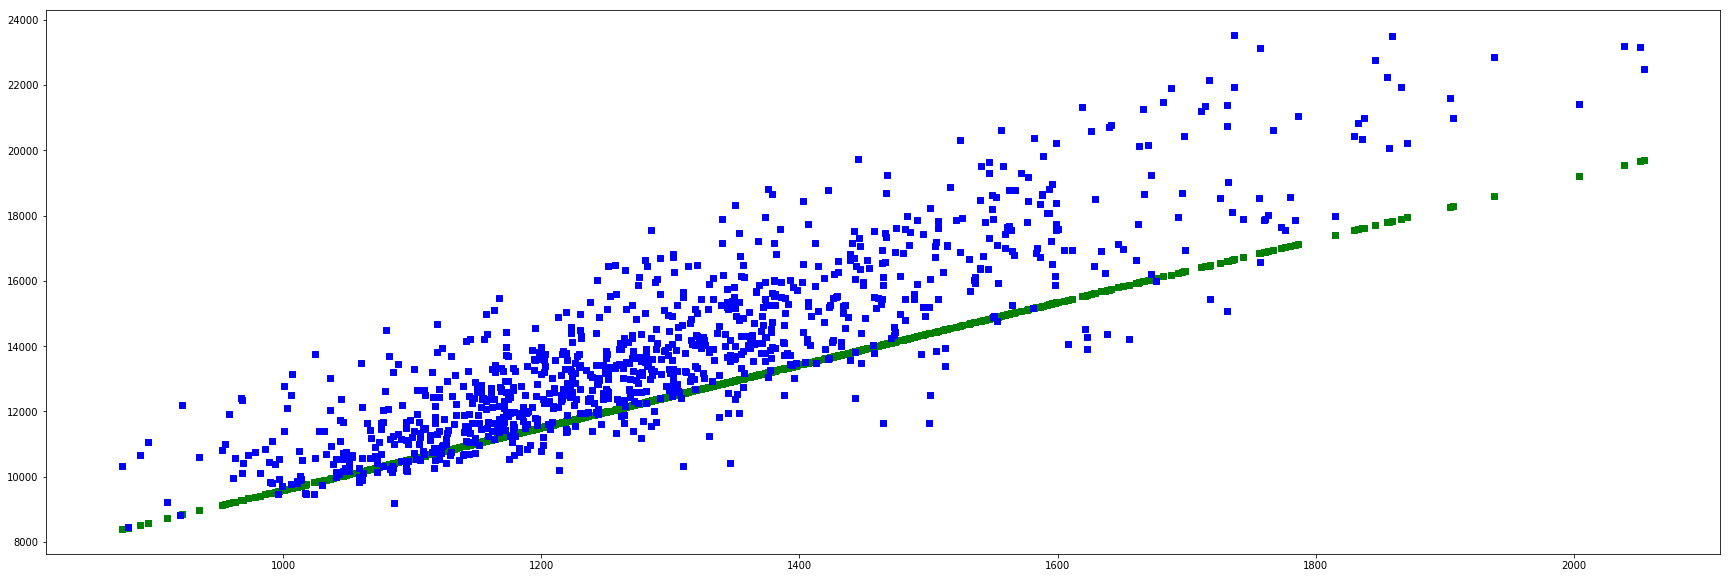

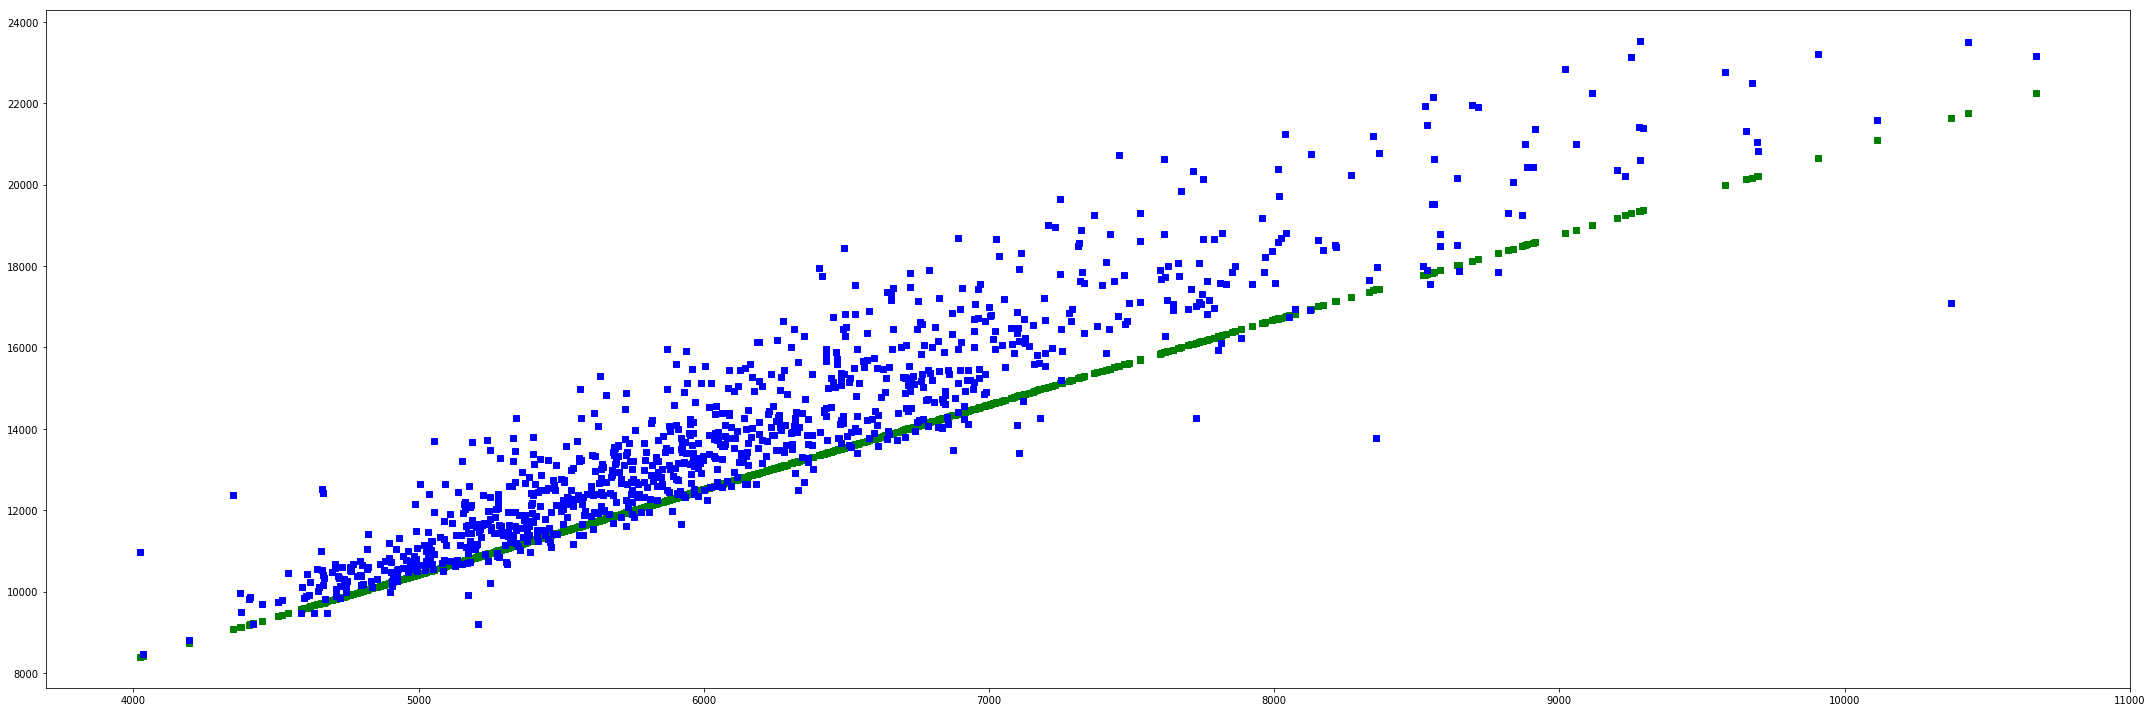

In [96]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
plt.plot(x['5K'], riegel_5k, 'gs', x['5K'], y, 'bs')

# Using a half marathon time is slightly better, but clearly it can be improved upon
plt.figure(figsize=(30,10))
plt.plot(x['half'], riegel_half, 'gs', x['half'], y, 'bs')

plt.tight_layout()
plt.show()

In [97]:
from itertools import combinations
from sklearn.base import clone

def runRegressor(reg, verbose=True):
    feature_combo_ns = []
    best_r2 = 0
    best_feature_combo = None
    best_percent_off = 0
    best_reg = None
    best_pred = None
    best_compare = None

    for i in range(6):
        feature_combo_ns.append(list(combinations([
            '5K','half','marathonTrainDis12','marathonTrainDis3','marathonTrainPaceSec12','marathonTrainDays12'], i+1)))

    #print feature_combo_ns

    for feature_combo_n in feature_combo_ns:
        for feature_combo in feature_combo_n:
            new_reg = clone(reg)
            print feature_combo
            predicted = new_reg.fit(X_train[list(feature_combo)], y_train).predict(X_test[list(feature_combo)])
            predicted = pd.Series(data = predicted)
            if verbose:
                printResults(X_test, y_test, predicted)
            r2 = r2_score(y_test, predicted)
            percent_off = abs(100 * (predicted - y_test)/y_test).mean()
            if r2 > best_r2:
                best_r2 = r2
                best_feature_combo = feature_combo
                best_percent_off = percent_off
                best_reg = new_reg
                best_pred = predicted
                best_compare = compare
            print '-----'
            
    print 'best feature combo: ', best_feature_combo
    print 'R2: {0:.3f}'.format(best_r2)
    print 'percent off: {0:.2f}%'.format(best_percent_off)
    
    return best_reg, best_r2, predicted, best_compare, best_feature_combo
        

In [98]:
# trying out a bunch of supervised learning regressors
import ipdb

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

best_r2 = 0
best_reg = None
best_predicted = None
best_compare = None
best_feature_combo = None

def runLotsORegressors():
    global best_r2
    global best_reg
    global best_predicted
    global best_compare
    global best_feature_combo
    regressors = [LinearRegression(),
                  GradientBoostingRegressor(),
                  Ridge(),
                  Lasso(),
                  AdaBoostRegressor(DecisionTreeRegressor(), random_state=42)
                 ]

    for reg in regressors:
        #for debugging uncomment below
        #ipdb.set_trace()
        print '----', reg ,'----'
        reg, r2, predicted, compare, feature_combo = runRegressor(reg)
        if r2 > best_r2:
            best_r2 = r2
            best_reg = reg
            best_predicted = predicted
            best_compare = compare
            best_feature_combo = feature_combo

    print 'best overall -----'
    print 'best feature combo: ', best_feature_combo
    print 'best reg: ', best_reg
    print 'best r2: ', best_r2
    
    display(best_compare.sample(20))
    
runLotsORegressors()

---- LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) ----
('5K',)
Average percent off 7.16%
Coefficient of Determination (R2):  0.751160312067
-----
('half',)
Average percent off 4.79%
Coefficient of Determination (R2):  0.873521379394
-----
('marathonTrainDis12',)
Average percent off 14.52%
Coefficient of Determination (R2):  0.0483585991363
-----
('marathonTrainDis3',)
Average percent off 13.52%
Coefficient of Determination (R2):  0.198860512582
-----
('marathonTrainPaceSec12',)
Average percent off 9.08%
Coefficient of Determination (R2):  0.554933724831
-----
('marathonTrainDays12',)
Average percent off 15.03%
Coefficient of Determination (R2):  0.0205396561751
-----
('5K', 'half')
Average percent off 4.80%
Coefficient of Determination (R2):  0.876962470901
-----
('5K', 'marathonTrainDis12')
Average percent off 7.10%
Coefficient of Determination (R2):  0.755219585265
-----
('5K', 'marathonTrainDis3')
Average percent off 6.93%
Coefficient of Determination

-----
('5K', 'half', 'marathonTrainDis12', 'marathonTrainDis3', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 4.79%
Coefficient of Determination (R2):  0.8814871069
-----
best feature combo:  ('5K', 'half', 'marathonTrainDis3', 'marathonTrainDays12')
R2: 0.882
percent off: 4.68%
---- GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False) ----
('5K',)
Average percent off 7.08%
Coefficient of Determination (R2):  0.737774261398
-----
('half',)
Average percent off 4.90%
Coefficient of Determination (R2):  0.850083016013
-----
('marathonTrainDis12',)
Average percent off 14.8

Average percent off 4.83%
Coefficient of Determination (R2):  0.880051598557
-----
('5K', 'half', 'marathonTrainDis12', 'marathonTrainDis3', 'marathonTrainDays12')
Average percent off 4.77%
Coefficient of Determination (R2):  0.882833968
-----
('5K', 'half', 'marathonTrainDis12', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 4.98%
Coefficient of Determination (R2):  0.870734975186
-----
('5K', 'half', 'marathonTrainDis3', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 4.78%
Coefficient of Determination (R2):  0.881565192054
-----
('5K', 'marathonTrainDis12', 'marathonTrainDis3', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 6.62%
Coefficient of Determination (R2):  0.777491524615
-----
('half', 'marathonTrainDis12', 'marathonTrainDis3', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 5.01%
Coefficient of Determination (R2):  0.869876502182
-----
('5K', 'half', 'marathonTrainDis12', 'marathonTrainDi

Coefficient of Determination (R2):  0.881847262005
-----
('5K', 'marathonTrainDis12', 'marathonTrainDis3', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 6.83%
Coefficient of Determination (R2):  0.772381137465
-----
('half', 'marathonTrainDis12', 'marathonTrainDis3', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 4.77%
Coefficient of Determination (R2):  0.880178416974
-----
('5K', 'half', 'marathonTrainDis12', 'marathonTrainDis3', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 4.79%
Coefficient of Determination (R2):  0.881487114285
-----
best feature combo:  ('5K', 'half', 'marathonTrainDis3', 'marathonTrainDays12')
R2: 0.882
percent off: 4.68%
---- Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) ----
('5K',)
Average percent off 7.16%
Coefficient of Determination (R2):  0.75116

Average percent off 4.79%
Coefficient of Determination (R2):  0.881488711463
-----
best feature combo:  ('5K', 'half', 'marathonTrainDis3', 'marathonTrainDays12')
R2: 0.882
percent off: 4.68%
---- AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=42) ----
('5K',)
Average percent off 8.22%
Coefficient of Determination (R2):  0.629023913874
-----
('half',)
Average percent off 6.14%
Coefficient of Determination (R2):  0.752763985748
-----
('marathonTrainDis12',)
Average percent off 17.92%
Coefficient of Determination (R2):  -0.79383807618
-----
('marathonTrainDis3',)
Average percent off 14.33%
Coefficient of Determin

Average percent off 4.74%
Coefficient of Determination (R2):  0.867584552946
-----
('5K', 'half', 'marathonTrainDis12', 'marathonTrainDis3', 'marathonTrainDays12')
Average percent off 4.42%
Coefficient of Determination (R2):  0.876861048281
-----
('5K', 'half', 'marathonTrainDis12', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 4.61%
Coefficient of Determination (R2):  0.864806440903
-----
('5K', 'half', 'marathonTrainDis3', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 4.62%
Coefficient of Determination (R2):  0.87362518033
-----
('5K', 'marathonTrainDis12', 'marathonTrainDis3', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 6.25%
Coefficient of Determination (R2):  0.767666954724
-----
('half', 'marathonTrainDis12', 'marathonTrainDis3', 'marathonTrainPaceSec12', 'marathonTrainDays12')
Average percent off 4.99%
Coefficient of Determination (R2):  0.845993002383
-----
('5K', 'half', 'marathonTrainDis12', 'marathonTrain

,5K,half,avg_dis3,avg_dis12,avg_pace,train_days,marathon_pred,marathon_true,percent_off
53,0:19:34,1:34:43,82,86,0:08:46,121.0,3:38:10,3:26:06,5.86%
171,0:22:33,1:51:05,61,93,0:11:09,128.0,4:17:23,4:50:55,11.52%
9,0:22:16,1:41:05,84,96,0:09:07,125.0,3:49:34,3:59:53,4.30%
104,0:18:23,1:19:18,178,165,0:08:02,259.0,3:00:06,2:55:30,2.62%
126,0:17:33,1:23:07,132,155,0:07:30,188.0,3:05:37,2:56:35,5.12%
178,0:22:25,1:43:55,60,127,0:09:28,134.0,3:52:27,4:15:55,9.17%
39,0:17:57,1:18:42,99,205,0:07:53,135.0,2:52:42,2:52:20,0.21%
187,0:19:34,1:32:37,26,73,0:08:31,46.0,3:24:39,3:48:21,10.37%
17,0:20:36,1:33:10,96,132,0:08:27,133.0,3:28:28,3:26:27,0.98%
150,0:17:53,1:21:48,164,250,0:07:30,288.0,2:54:22,2:48:50,3.29%


In [99]:
display(best_reg)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [100]:
# Personal Prediction back in 2009
print best_reg

myDF = pd.DataFrame(
    [[timeToSeconds('23:03'),timeToSeconds('1:48:36'), 70, 520]], columns=(
        '5K', 'half', 'marathonTrainDis12', 'marathonTrainPaceSec12'))

my_predicted_marathon = best_reg.predict(myDF)

print '2009 - first marathon:'
print 'online calculator: ', secondsToTime(riegel(timeToSeconds('23:03')))
print 'ML Race Predictor: ', secondsToTime(my_predicted_marathon)
print 'What I actually ran: 3:54:34'

myDF = pd.DataFrame(
    [[timeToSeconds('20:51'),timeToSeconds('1:40:36'), 120, 510]], columns=(
        '5K', 'half', 'marathonTrainDis12', 'marathonTrainPaceSec12'))

my_predicted_marathon = best_reg.predict(myDF)
print '-------------------'
print '2010 - pr marathon:'
print 'online calculator: ', secondsToTime(riegel(timeToSeconds('20:51')))
print 'ML Race Predictor: ', secondsToTime(my_predicted_marathon)
print 'What I actually ran: 3:37:07'


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


ValueError: Number of features of the model must match the input. Model n_features is 3 and input n_features is 4 

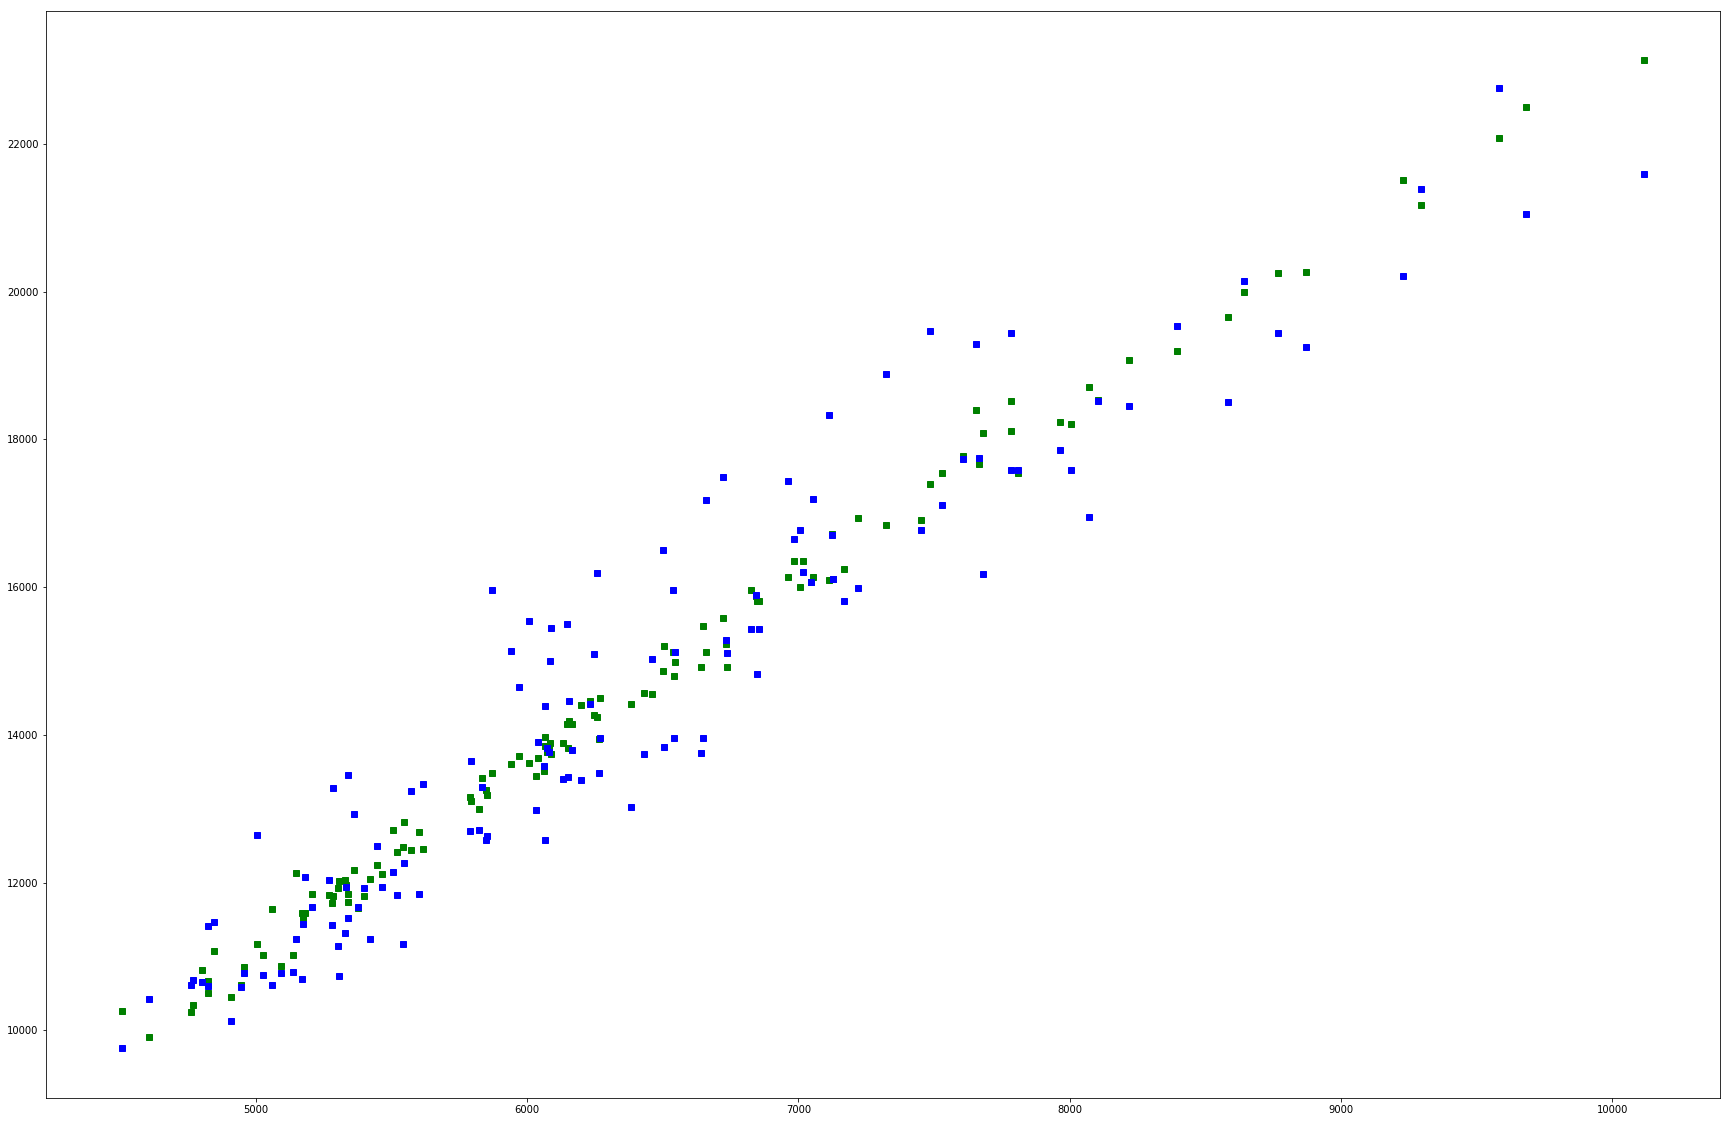

In [470]:
import numpy as np
import matplotlib.pyplot as plt

# red dashes, blue squares and green triangles
plt.figure(figsize=(30,20))
plt.plot(X_test['half'], best_predicted, 'gs', X_test['half'], y_test, 'bs')
plt.show()

In [471]:
# normalize the data

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

numerical = ['5K', 'half', 'marathon', 'averageDistance', 'averagePaceSeconds']

data_normalized = pd.DataFrame(data = data_clean)
data_normalized[numerical] = scaler.fit_transform(data_normalized[numerical])

# Show an example of a record with scaling applied
display(data_normalized.sample(n = 5))

,5K,half,marathon,averageDistance,averagePaceSeconds
347,0.382998,0.328736,0.428562,0.225912,0.659943
1,0.009141,0.027750,0.000000,0.755074,0.148517
506,0.543876,0.482102,0.536857,0.151565,0.413238
150,0.239488,0.271757,0.278891,0.384193,0.240314
582,0.677331,0.617898,0.553774,0.299881,0.433270


In [472]:
# split the normalized data
# Split the data into features and target label
y = data_normalized['marathon']
x = data_normalized.drop('marathon', axis = 1)

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 509 samples.
Testing set has 128 samples.


In [473]:
# train and predict but now on normalized data
runLotsORegressors()


---- LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) ----
Average percent off 23.61%
Coefficient of Determination (R2):  0.794585865022
Average percent off 15.56%
Coefficient of Determination (R2):  0.895058798987
Average percent off 45.77%
Coefficient of Determination (R2):  0.29710275314
Average percent off 32.68%
Coefficient of Determination (R2):  0.633860149656
Average percent off 15.59%
Coefficient of Determination (R2):  0.895749523977
Average percent off 22.89%
Coefficient of Determination (R2):  0.809149458937
Average percent off 22.10%
Coefficient of Determination (R2):  0.81502844966
Average percent off 15.08%
Coefficient of Determination (R2):  0.901264433724
Average percent off 15.42%
Coefficient of Determination (R2):  0.894377091654
Average percent off 27.55%
Coefficient of Determination (R2):  0.706890985848
Average percent off 15.04%
Coefficient of Determination (R2):  0.90157106975
Average percent off 15.43%
Coefficient of Determination (R